# EDA Exercise

In this exercise, you will read in your data, do some preliminary data cleaning, and do EDA to better understand your data.

[The dataset]( http://ddc-datascience.s3-website-us-west-1.amazonaws.com/auto-mpg.csv ) for this exercise is saved in an Amazon Web Services ( AWS ) S3 bucket. The original source and details about this dataset can be found [here](https://archive.ics.uci.edu/ml/datasets/Auto+MPG).

Below are the steps you'll need to perform for the EDA. Make sure to use text blocks to organize your analysis.  Discuss any trends/relationships/issues you discover at each step in the analysis.

1. Import `pandas` as `pd`, `matplotlib.pyplot as plt`, and `seaborn as sns`.
1. Read in the csv file found at http://ddc-datascience.s3-website-us-west-1.amazonaws.com/auto-mpg.csv .
1. Understand your data by using at least 4 pandas methods (e.g., `.head()`).
1. Make a copy of your data frame. In your copy, remove any rows that contain null values.  
1. Calculate summary statistics on one or more columns.
1. Generate at least 3 univariate plots.
1. Generate a correlation plot.
1. Generate a pairplot.
9. If we were going to build a predictive model ( supervised learning ) using this dataset, what do you think would be a good response ( aka target ) variable and why?

## Step 1: Import



Import pandas as pd, matplotlib.pyplot as plt, and seaborn as sns.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Step 2: Get data


Read in the csv file found at http://ddc-datascience.s3-website-us-west-1.amazonaws.com/auto-mpg.csv .


In [ ]:
base_path = 'http://ddc-datascience.s3-website-us-west-1.amazonaws.com/auto-mpg.csv'

## Step 3: Understand data


Understand your data by using at least 4 pandas methods (e.g., .head()).


In [ ]:
df = pd.read_csv(base_path)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
dtypes: float64(4), int64(4)
memory usage: 25.0 KB


In [ ]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130.0,3504,12.0,70,1
1,15.0,8,350.0,165.0,3693,11.5,70,1
2,18.0,8,318.0,150.0,3436,11.0,70,1
3,16.0,8,304.0,150.0,3433,12.0,70,1
4,17.0,8,302.0,140.0,3449,10.5,70,1


## Step 4: Copy and clean


Make a copy of your data frame. In your copy, remove any rows that contain null values.


In [ ]:
df.isnull().sum()

,0
mpg,0
cylinders,0
displacement,0
horsepower,6
weight,0
acceleration,0
model year,0
origin,0


In [ ]:
df['horsepower']=df['horsepower'].fillna(150.0)
df.isnull().sum()

,0
mpg,0
cylinders,0
displacement,0
horsepower,0
weight,0
acceleration,0
model year,0
origin,0


In [ ]:
df_copy = df.copy()

## Step 5: Summary stats


Calculate summary statistics on one or more columns.


In [22]:
df_copy['cylinders'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 398 entries, 0 to 397
Series name: cylinders
Non-Null Count  Dtype
--------------  -----
398 non-null    int64
dtypes: int64(1)
memory usage: 3.2 KB


In [21]:
df_copy['horsepower'].head()

,horsepower
0,130.0
1,165.0
2,150.0
3,150.0
4,140.0


## Step 6: Univariate plots


Generate at least 3 univariate plots.


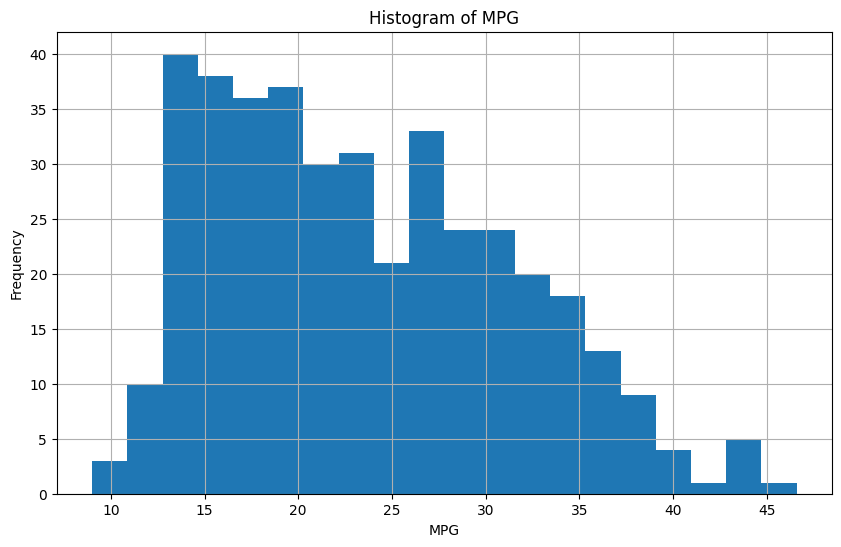

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


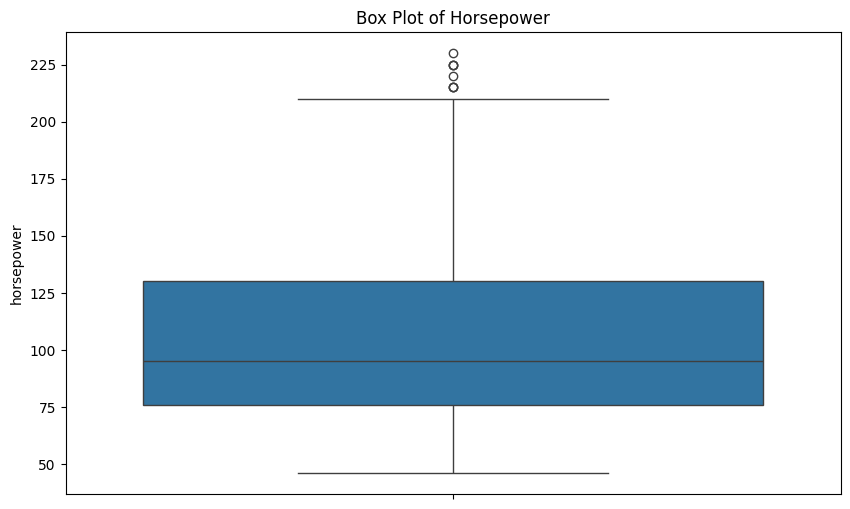

<ipython-input-23-6632bf666274>:17: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df['weight'], shade=True)


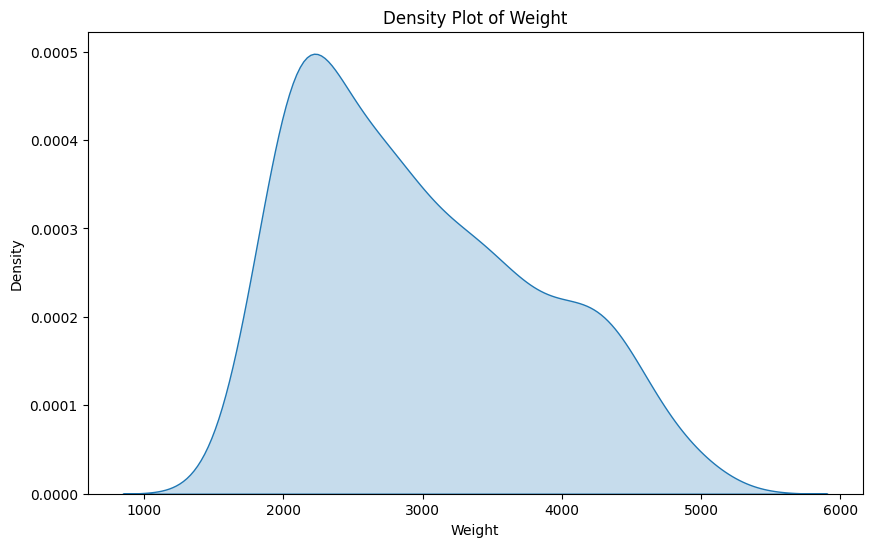

In [23]:
# 1. Histogram of mpg
plt.figure(figsize=(10, 6))
df['mpg'].hist(bins=20)
plt.title('Histogram of MPG')
plt.xlabel('MPG')
plt.ylabel('Frequency')
plt.show()

# Box plot of horsepower
plt.figure(figsize=(10, 6))
sns.boxplot(data=df['horsepower'])
plt.title('Box Plot of Horsepower')
plt.show()

# 4. Density plot of weight
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df['weight'], shade=True)
plt.title('Density Plot of Weight')
plt.xlabel('Weight')
plt.ylabel('Density')
plt.show()

## Step 7: Bivariate plot (1/2)


Generate a correlation plot.


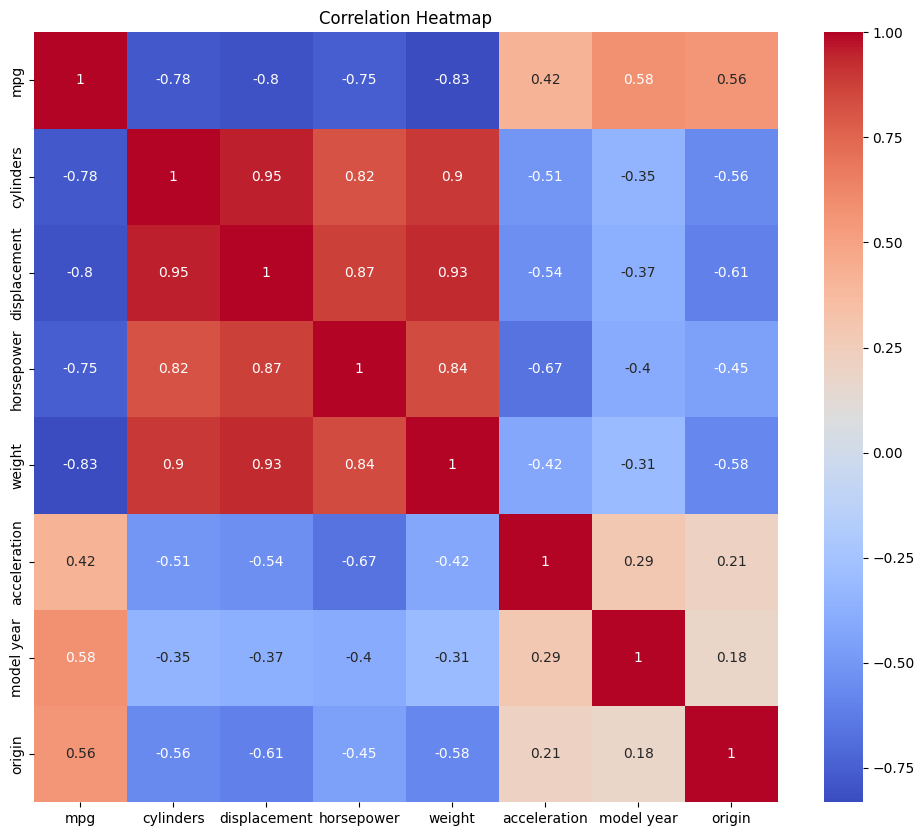

In [25]:
# 4. Heatmap of correlation matrix
corr_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

## Step 8: Bivariate plot (2/2)


Generate a pairplot.


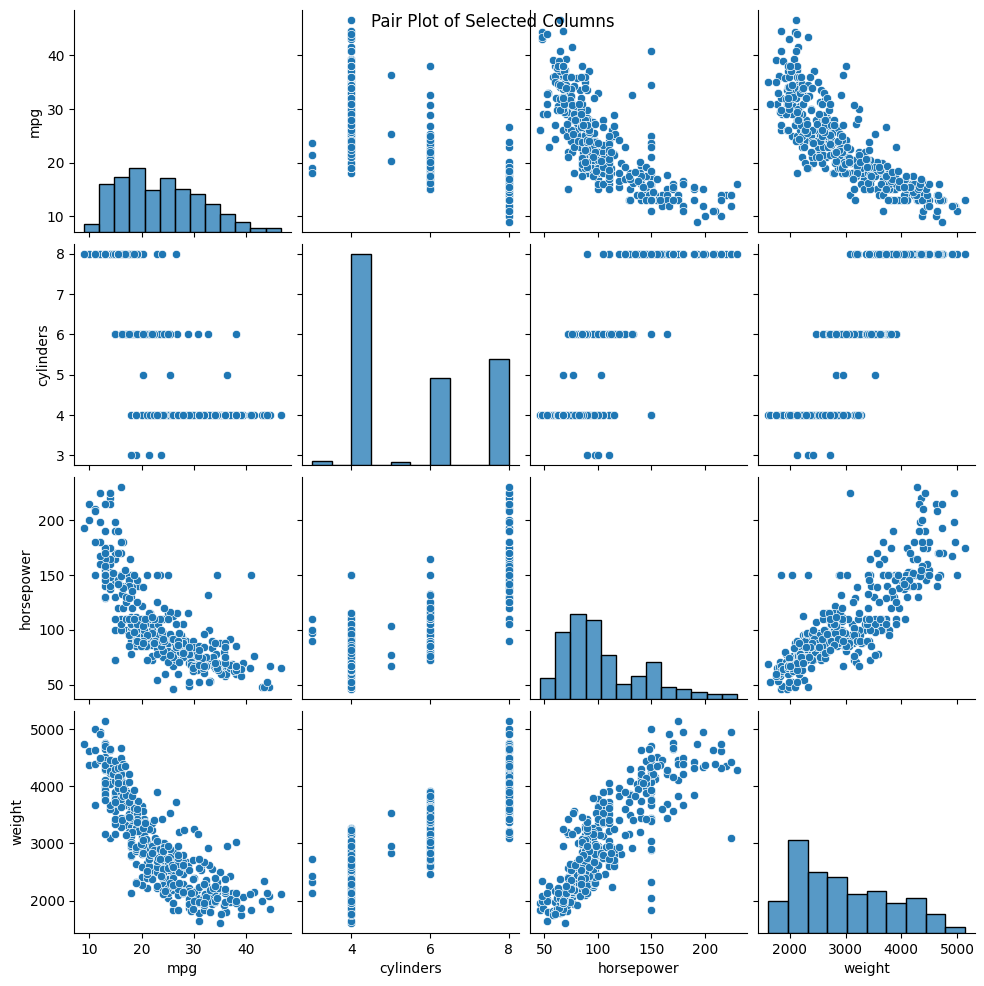

In [24]:
# 3. Pair plot of selected columns
selected_columns = ['mpg', 'cylinders', 'horsepower', 'weight']
sns.pairplot(df[selected_columns])
plt.suptitle('Pair Plot of Selected Columns')
plt.show()

## Step 9: Conclusion


If we were going to build a predictive model ( supervised learning ) using this dataset, what do you think would be a good response ( aka target ) variable and why?

I think that mpg is the target because of how all of the other variables have outsized correlation to effects with mpg